In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#import dataset
data=pd.read_csv(r'C:\Users\91724\Desktop\python_analysis_projects\election_results\election_results_2024.csv')



In [7]:
data.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


***Party with highest and lowest margin victory***

In [11]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)
data['Margin']=pd.to_numeric(data['Margin'],errors='coerce')

highest_margin=data.loc[data['Margin'].idxmax()]
lowest_margin=data.loc[data['Margin'].idxmin()]


In [18]:
party_votes.info()

<class 'pandas.core.series.Series'>
Index: 42 entries, Kerala Congress to Hindustani Awam Morcha (Secular)
Series name: Margin
Non-Null Count  Dtype 
--------------  ----- 
42 non-null     object
dtypes: object(1)
memory usage: 672.0+ bytes


***Plot numer of seats won by each party***

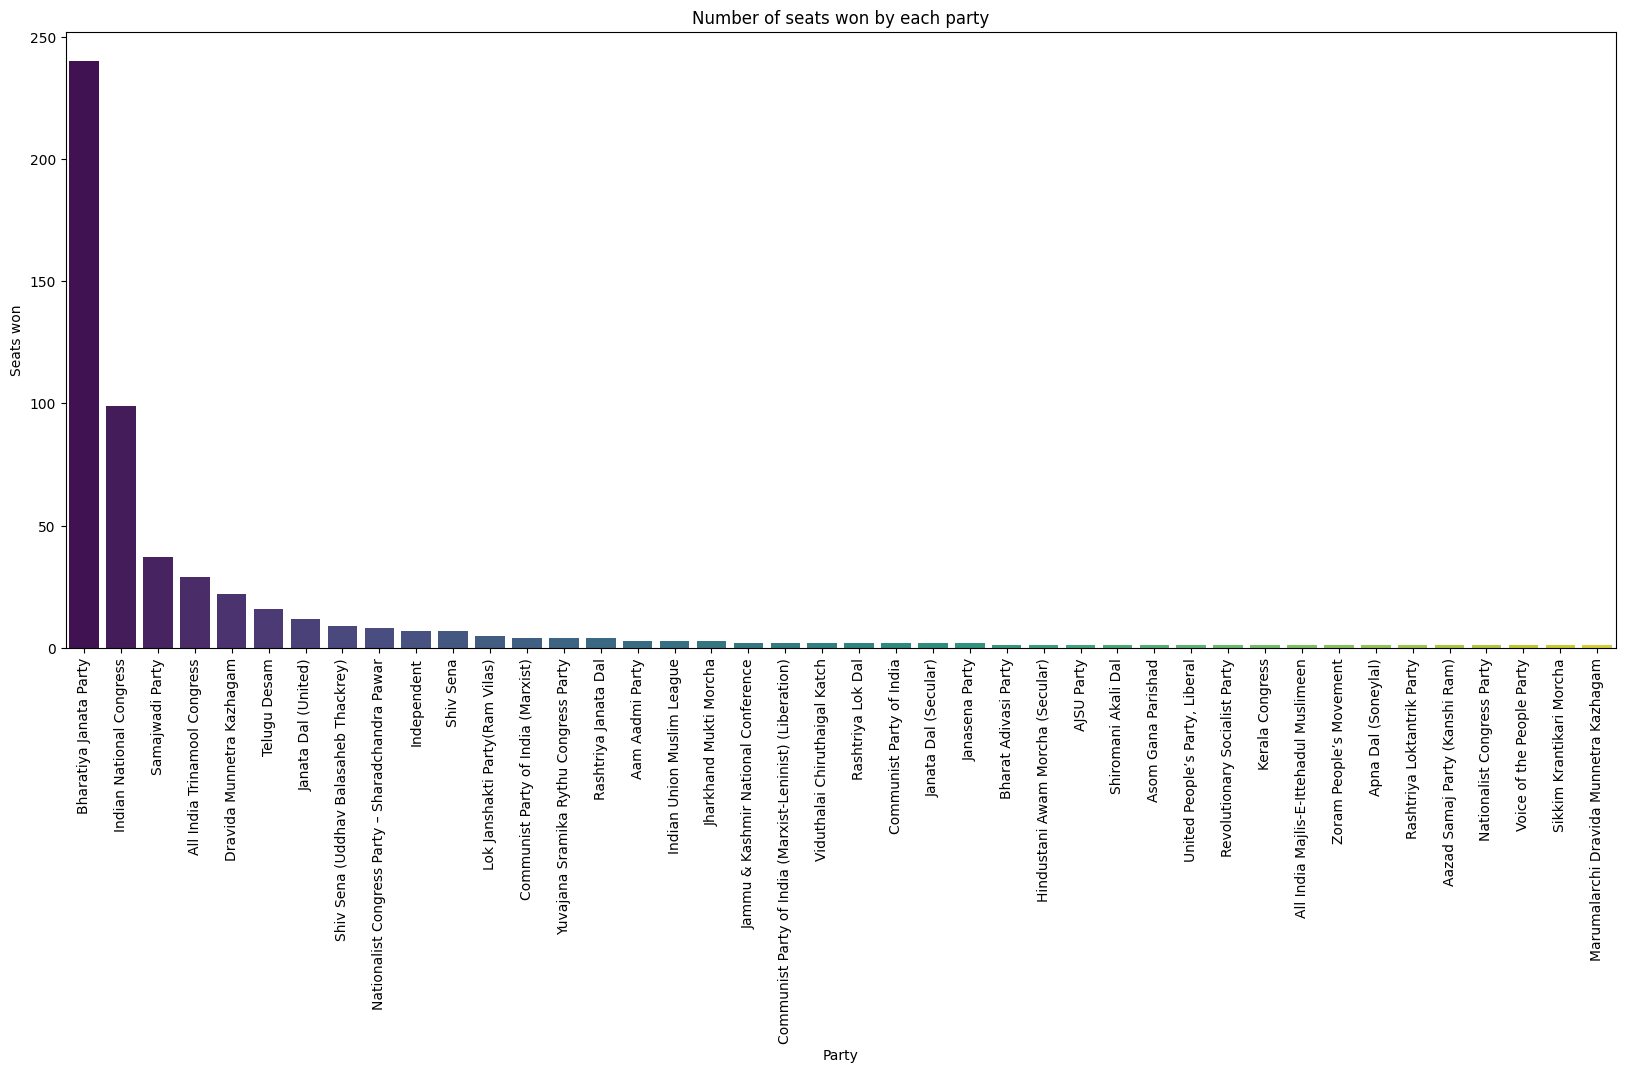

In [16]:
leading_party_highest_votes=party_votes.idxmax()
leading_party_lowest_votes=party_votes.idxmin()
seats_won=data['Leading Party'].value_counts()
plt.figure(figsize=(20,8))
sns.barplot(x=seats_won.index,hue=seats_won.index,legend=False,y=seats_won.values,palette='viridis')
plt.title('Number of seats won by each party')
plt.xlabel('Party')
plt.ylabel('Seats won')
plt.xticks(rotation=90)
plt.show()


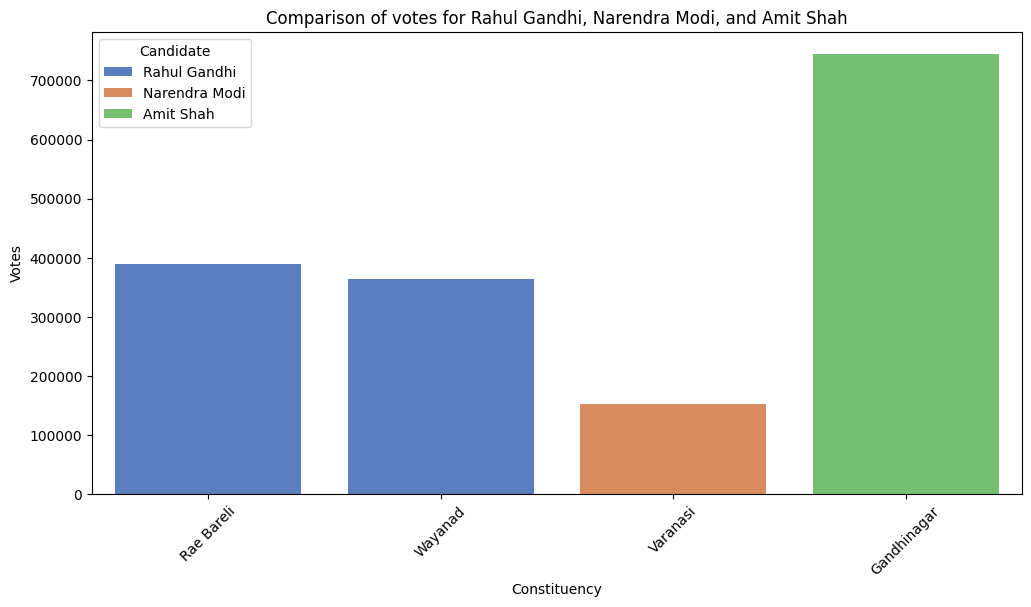

In [21]:
# Get different entries for all Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_entries = data[data['Leading Candidate'] == 'RAHUL GANDHI']
modi_entries = data[data['Leading Candidate'] == 'NARENDRA MODI']
amit_entries = data[data['Leading Candidate'] == 'AMIT SHAH']

# Get votes for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_votes = rahul_entries['Margin'].values
modi_votes = modi_entries['Margin'].values[0] if not modi_entries.empty else 0
amit_votes = amit_entries['Margin'].values[0] if not amit_entries.empty else 0

# Get constituencies for Rahul Gandhi, Narendra Modi, and Amit Shah
rahul_const = list(rahul_entries['Constituency'])
modi_const = list(modi_entries['Constituency'])[0] if not modi_entries.empty else "Unknown"
amit_const = list(amit_entries['Constituency'])[0] if not amit_entries.empty else "Unknown"

# Combine the data of votes and constituencies
data_to_plot = pd.DataFrame({
    'Candidate': ['Rahul Gandhi'] * len(rahul_votes) + ['Narendra Modi', 'Amit Shah'],
    'Constituency': rahul_const + [modi_const, amit_const],
    'Votes': list(rahul_votes) + [modi_votes, amit_votes]
})

# Plot the comparison
plt.figure(figsize=(12,6))
sns.barplot(data=data_to_plot, x='Constituency', y='Votes', hue='Candidate', palette='muted')
plt.title('Comparison of votes for Rahul Gandhi, Narendra Modi, and Amit Shah')
plt.xlabel('Constituency')
plt.ylabel('Votes')
plt.xticks(rotation=45)
plt.show()


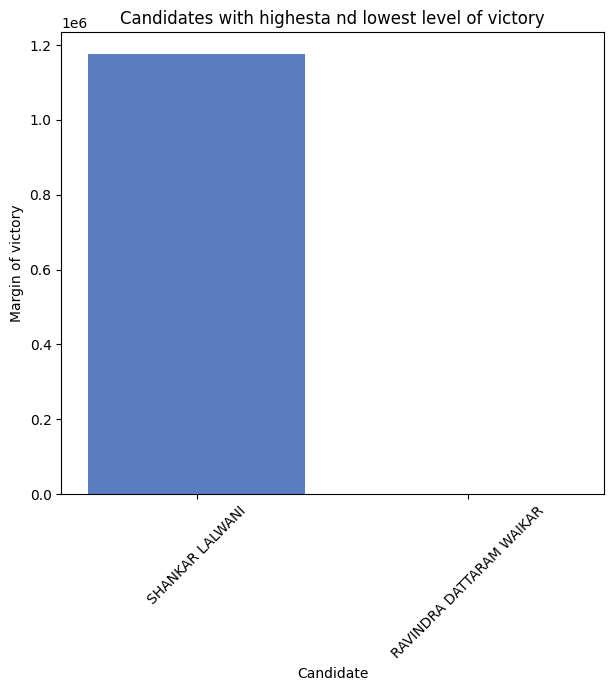

In [34]:
highest_margin_entry=data.loc[data['Margin'].idxmax()]
lowest_margin_entry=data.loc[data['Margin'].idxmin()]
#combine the data
data_to_plot=pd.DataFrame({
    'Candidate':[highest_margin_entry['Leading Candidate'],lowest_margin_entry['Leading Candidate']],
    'Party':[highest_margin_entry['Leading Party'],lowest_margin_entry['Leading Party']],
    'Margin':[highest_margin_entry['Margin'],lowest_margin_entry['Margin']],
})
#plot the comparisons 
plt.figure(figsize=(7,6))
sns.barplot(data=data_to_plot,x='Candidate',y='Margin', hue='Candidate',palette='muted')
plt.title('Candidates with highesta nd lowest level of victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of victory')
plt.xticks(rotation=45)
plt.show()


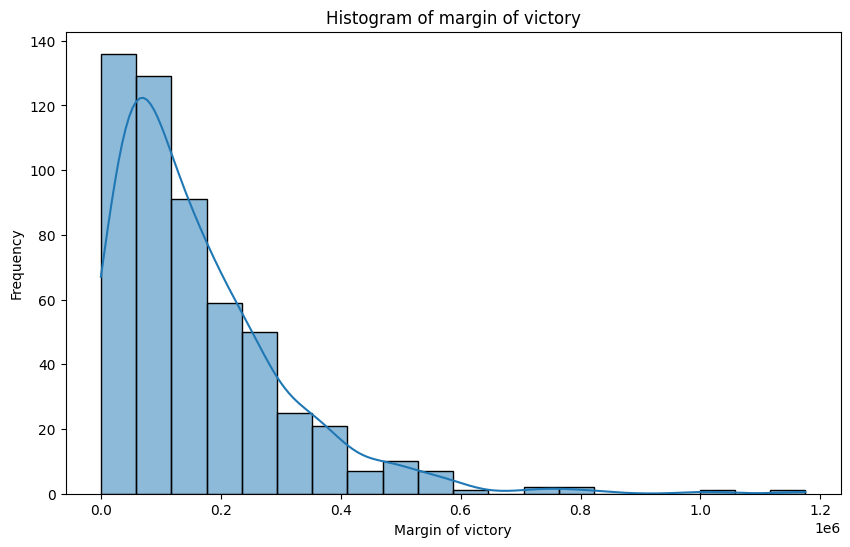

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(data['Margin'],bins=20,kde=True)
plt.title('Histogram of margin of victory')
plt.xlabel('Margin of victory')
plt.ylabel('Frequency')
plt.show()

***Votes distribution by party***

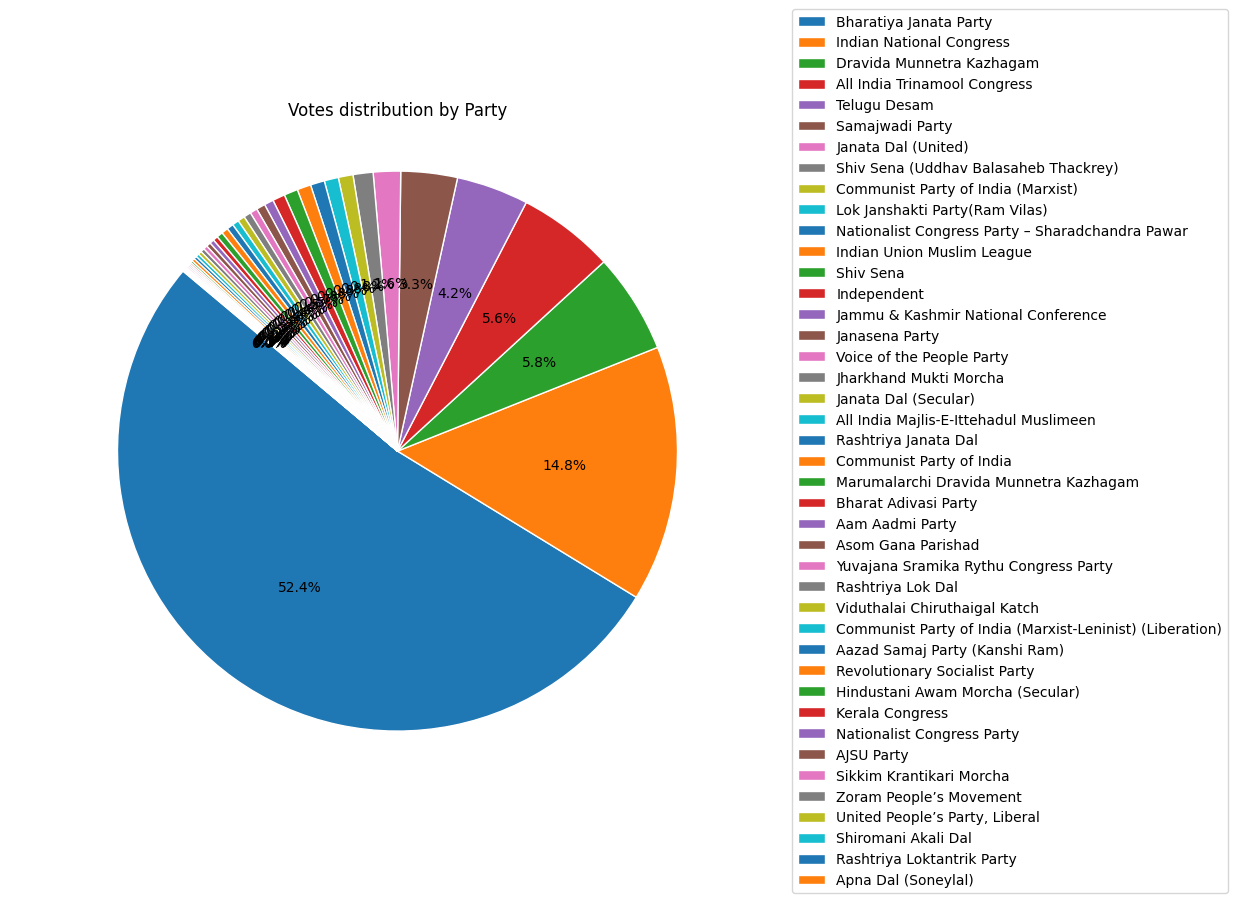

In [40]:
party_votes=data.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

#plot pie chart
plt.figure(figsize=(10,8))
wedges,texts,autotexts =plt.pie(party_votes,labels=None,autopct='%1.1f%%',startangle=140,wedgeprops=dict(edgecolor='w'))
plt.title('Votes distribution by Party',pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index,loc='center left',bbox_to_anchor=(1,0.5),fontsize='medium')
plt.show()


***Top 10 trailing parties by votes***


C:\Users\91724\AppData\Local\Temp\ipykernel_7480\3109293172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(4, 0, 'Communist Party of India (Marxist)'),
  Text(5, 0, 'Samajwadi Party'),
  Text(6, 0, 'Biju Janata Dal'),
  Text(7, 0, 'Rashtriya Janata Dal'),
  Text(8, 0, 'Bahujan Samaj Party'),
  Text(9, 0, 'Aam Aadmi Party')])

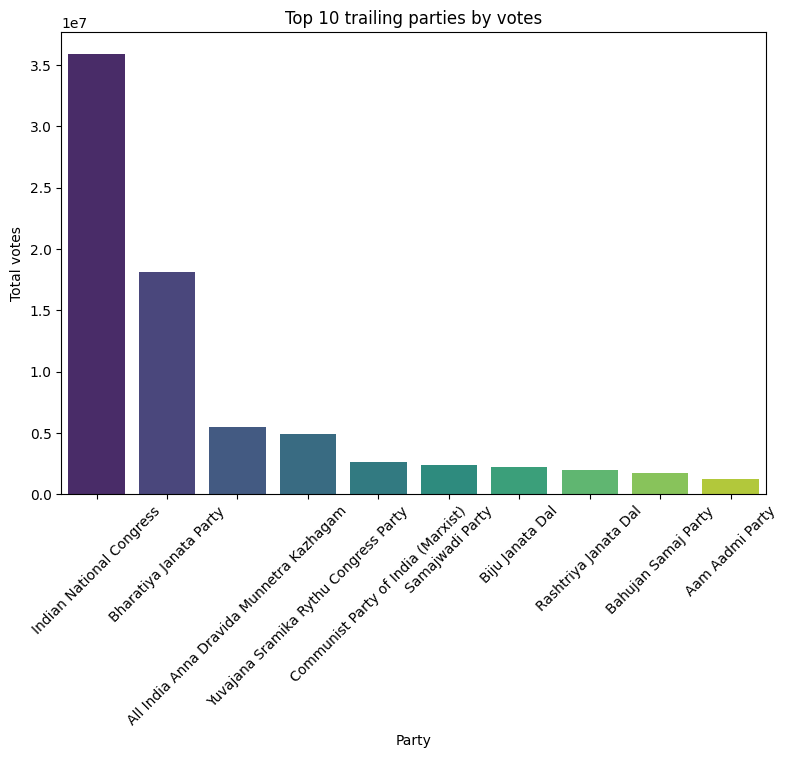

In [50]:
trailing_party_votes=data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=False)
trailing_party_seats=data['Trailing Party'].value_counts()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')
plt.title('Top 10 trailing parties by votes')
plt.xlabel('Party')
plt.ylabel('Total votes')
plt.xticks(rotation=45)

***Top 10 trailing parties by seats***

C:\Users\91724\AppData\Local\Temp\ipykernel_7480\591629877.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_seats.index[:10],y=trailing_party_seats.values[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indian National Congress'),
  Text(1, 0, 'Bharatiya Janata Party'),
  Text(2, 0, 'All India Anna Dravida Munnetra Kazhagam'),
  Text(3, 0, 'Samajwadi Party'),
  Text(4, 0, 'Yuvajana Sramika Rythu Congress Party'),
  Text(5, 0, 'Biju Janata Dal'),
  Text(6, 0, 'Rashtriya Janata Dal'),
  Text(7, 0, 'Communist Party of India (Marxist)'),
  Text(8, 0, 'Aam Aadmi Party'),
  Text(9, 0, 'All India Trinamool Congress')])

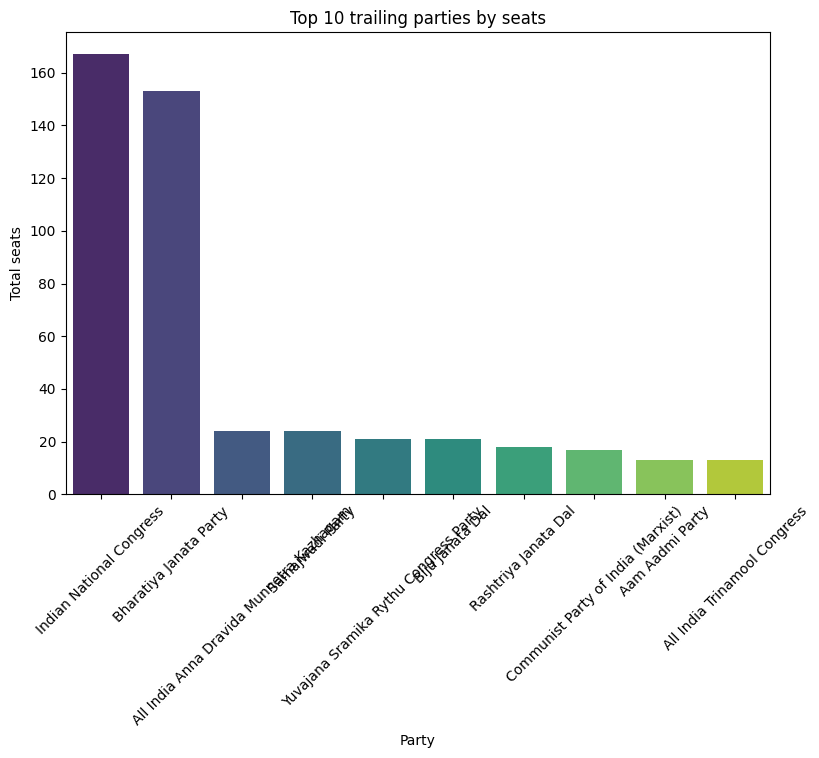

In [49]:
trailing_party_seats=data['Trailing Party'].value_counts()
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=trailing_party_seats.index[:10],y=trailing_party_seats.values[:10],palette='viridis')
plt.title('Top 10 trailing parties by seats')
plt.xlabel('Party')
plt.ylabel('Total seats')
plt.xticks(rotation=45)

***Top 10 leading parties by votes*** 

C:\Users\91724\AppData\Local\Temp\ipykernel_7480\2330916533.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pattali Makkal Katch'),
  Text(1, 0, 'Janata Dal (Secular)'),
  Text(2, 0, 'Nationalist Democratic Progressive Party'),
  Text(3, 0, 'Bodoland Peoples Front'),
  Text(4, 0, 'Telugu Desam'),
  Text(5, 0, 'Mizo National Front'),
  Text(6, 0, 'Citizen Action Party-Sikkim'),
  Text(7, 0, 'Naga Peoples Front'),
  Text(8, 0, 'Kerala Congress (M)'),
  Text(9, 0, 'Apna Dal (Soneylal)')])

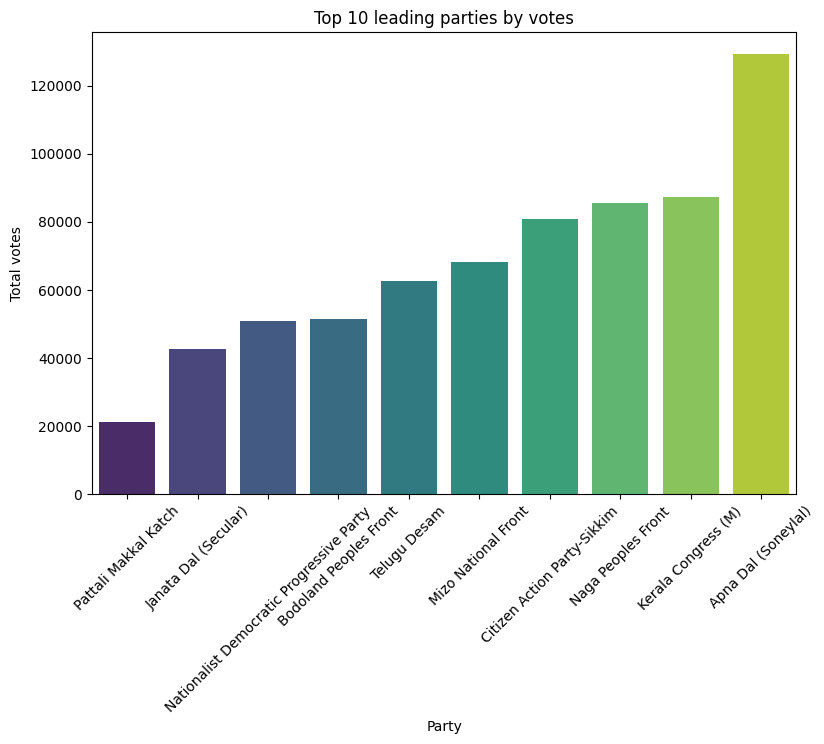

In [56]:
trailing_party_votes=data.groupby('Trailing Party')['Margin'].sum().sort_values(ascending=True)

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(x=trailing_party_votes.index[:10],y=trailing_party_votes.values[:10],palette='viridis')
plt.title('Top 10 leading parties by votes')
plt.xlabel('Party')
plt.ylabel('Total votes')
plt.xticks(rotation=45)